In [73]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Math, display

In [62]:
# 1. Define folder and get list of CSVs
data_folder = 'data'
if not os.path.exists(data_folder):
    os.makedirs(data_folder)

files = [f for f in os.listdir(data_folder) if f.endswith('.csv')]

# 2. Display the list with numbers
if not files:
    print(f"❌ No CSV files found in '{data_folder}' folder. Please upload one first!")
elif len(files) < 2:
    print(f"⚠️ Only {len(files)} CSV file found. You need at least 2 files (reference and test).")
else:
    print("--- Available Data Files ---")
    for i, filename in enumerate(files):
        print(f"[{i}] {filename}")

--- Available Data Files ---
[0] Test.csv
[1] Reference.csv


In [63]:
# 3. Ask for reference and test file indices
ref_choice = input("\nEnter the number for the REFERENCE file: ")
test_choice = input("Enter the number for the TEST file: ")
    
try:
    ref_index = int(ref_choice)
    test_index = int(test_choice)
    
    if ref_index == test_index:
        print("❌ Reference and test files must be different!")
    else:
        ref_file = files[ref_index]
        test_file = files[test_index]
        ref_path = os.path.join(data_folder, ref_file)
        test_path = os.path.join(data_folder, test_file)
        
        print(f"✅ Reference: {ref_file}")
        print(f"✅ Test: {test_file}")
except (ValueError, IndexError):
    print("❌ Invalid selection. Please run the cell again and enter valid numbers.")

✅ Reference: Reference.csv
✅ Test: Test.csv


In [64]:
# Load both files and check structure
if 'ref_path' in locals() and 'test_path' in locals():
    ref_data = pd.read_csv(ref_path, sep=';', index_col=0)
    test_data = pd.read_csv(test_path, sep=';', index_col=0)
    
    print(f"\n--- Reference File: {ref_file} ---")
    print(f"Shape: {ref_data.shape}")
    print(f"Columns: {ref_data.columns.tolist()}")
    print(f"\n--- Test File: {test_file} ---")
    print(f"Shape: {test_data.shape}")
    print(f"Columns: {test_data.columns.tolist()}")
    
    # Check if time points match
    if ref_data.columns.tolist() != test_data.columns.tolist():
        print("\n⚠️ WARNING: Column headers don't match between files!")
        print("Time points must be identical for f2 calculations.")
    else:
        print("\n✅ Column structure matches!")
        
    # Display first few rows
    print("\n--- Reference Data Preview ---")
    print(ref_data.head())
    print("\n--- Test Data Preview ---")
    print(test_data.head())
else:
    print("❌ Files not selected. Run the previous cell first.")


--- Reference File: Reference.csv ---
Shape: (6, 12)
Columns: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

--- Test File: Test.csv ---
Shape: (6, 12)
Columns: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

✅ Column structure matches!

--- Reference Data Preview ---
              1      2      3      4      5      6      7      8      9  \
min/tbl.                                                                  
10        40.60  47.02  46.09  41.83  47.17  44.66  41.52  45.09  47.25   
15        52.08  57.48  55.10  51.15  54.17  53.68  52.29  53.26  55.19   
20        58.15  64.84  62.46  58.35  59.38  59.92  59.31  58.70  60.97   
30        65.67  73.19  72.85  66.06  65.41  66.76  68.38  65.81  68.76   
45        74.08  80.55  80.14  71.89  71.13  73.33  76.76  72.12  75.29   

             10     11     12  
min/tbl.                       
10        43.47  47.29  45.63  
15        50.41  54.99  53.61  
20        54.96  60.43  60.34  
30       

In [65]:
# === CELL: Load and preserve original data ===
if 'ref_path' in locals() and 'test_path' in locals():
    ref_data = pd.read_csv(ref_path, sep=';', index_col=0)
    test_data = pd.read_csv(test_path, sep=';', index_col=0)
    
    # Preserve originals
    ref_data_original = ref_data.copy()
    test_data_original = test_data.copy()
    
    print("✅ Data loaded and original copies preserved")

# === CELL: Calculate statistics (can run multiple times safely) ===
# Always calculate from originals
ref_means = ref_data_original.mean(axis=1)
ref_sds = ref_data_original.std(axis=1)
ref_rsds = ((ref_sds / ref_means) * 100)

test_means = test_data_original.mean(axis=1)
test_sds = test_data_original.std(axis=1)
test_rsds = ((test_sds / test_means) * 100)

# Update working DataFrame
ref_data = ref_data_original.copy()  # Fresh copy
ref_data['Mean'] = ref_means
ref_data['SD'] = ref_sds
ref_data['RSD%'] = ref_rsds

test_data = test_data_original.copy()  # Fresh copy
test_data['Mean'] = test_means
test_data['SD'] = test_sds
test_data['RSD%'] = test_rsds


✅ Data loaded and original copies preserved


In [77]:
ref_data.style.format({
    'Mean': '{:.2f}',
    'SD': '{:.2f}',
    'RSD%': '{:.2f}'
})

print(ref_data)

              1      2      3      4      5      6      7      8      9  \
min/tbl.                                                                  
10        40.60  47.02  46.09  41.83  47.17  44.66  41.52  45.09  47.25   
15        52.08  57.48  55.10  51.15  54.17  53.68  52.29  53.26  55.19   
20        58.15  64.84  62.46  58.35  59.38  59.92  59.31  58.70  60.97   
30        65.67  73.19  72.85  66.06  65.41  66.76  68.38  65.81  68.76   
45        74.08  80.55  80.14  71.89  71.13  73.33  76.76  72.12  75.29   
60        78.55  85.54  84.15  75.76  74.88  77.65  81.40  75.35  79.97   

             10     11     12       Mean        SD      RSD%  
min/tbl.                                                      
10        43.47  47.29  45.63  44.801667  2.415721  5.392033  
15        50.41  54.99  53.61  53.617500  1.963601  3.662239  
20        54.96  60.43  60.34  59.817500  2.420038  4.045702  
30        60.90  68.09  68.01  67.490833  3.312814  4.908539  
45        65.99  75.4

In [67]:
test_data.style.format({
    'Mean': '{:.2f}',
    'SD': '{:.2f}',
    'RSD%': '{:.2f}'
})

,1,2,3,4,5,6,7,8,9,10,11,12,Mean,SD,RSD%
min/tbl.,,,,,,,,,,,,,,,
10,48.610000,54.020000,52.460000,49.920000,49.490000,66.160000,44.170000,55.100000,44.100000,53.480000,47.730000,50.080000,51.28,5.86,11.43
15,61.550000,65.760000,63.050000,57.200000,57.910000,74.980000,52.150000,68.250000,55.650000,63.170000,56.740000,58.900000,61.28,6.27,10.23
20,69.550000,72.990000,69.900000,61.310000,64.470000,80.300000,57.220000,75.950000,63.540000,68.380000,62.530000,63.980000,67.51,6.62,9.81
30,78.460000,80.810000,78.750000,67.290000,73.880000,86.990000,62.730000,84.730000,72.170000,77.220000,70.820000,70.820000,75.39,7.11,9.43
45,85.530000,87.070000,85.110000,72.320000,80.300000,91.570000,66.410000,91.590000,77.260000,83.940000,76.840000,77.430000,81.28,7.62,9.37
60,89.070000,90.450000,88.470000,75.510000,83.870000,93.750000,68.930000,69.770000,80.750000,87.800000,81.050000,80.890000,82.53,7.98,9.68


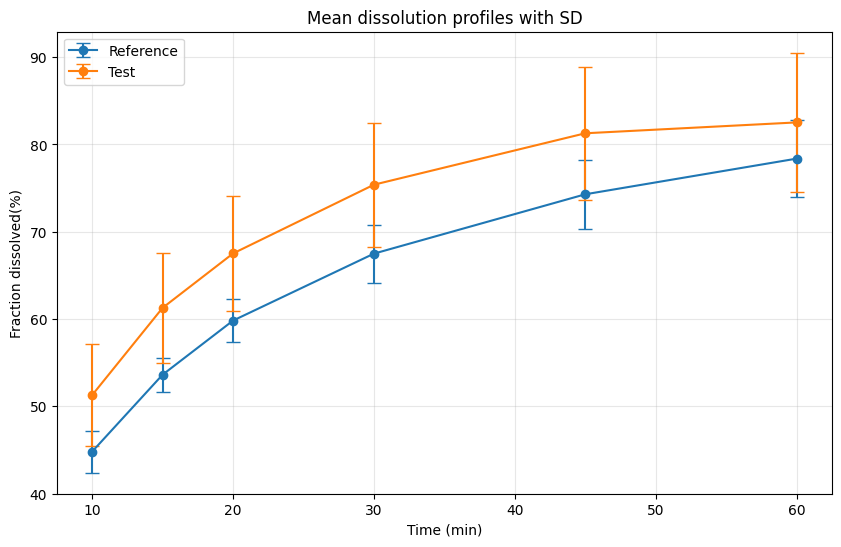

In [68]:
# Create figure
plt.figure(figsize=(10, 6))

# Plot reference with error bars
plt.errorbar(ref_data.index, ref_data['Mean'], yerr=ref_data['SD'], label='Reference', marker='o', capsize=5)

# Plot test with error bars
plt.errorbar(test_data.index, test_data['Mean'], yerr=test_data['SD'], label='Test', marker='o', capsize=5)

# Labels and formatting
plt.xlabel('Time (min)')
plt.ylabel('Fraction dissolved(%)')
plt.title('Mean dissolution profiles with SD')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [74]:
#Calculation of the f1 difference factor
abs_diff = abs(ref_data['Mean'] - test_data['Mean'])
sum_abs_diff = sum(abs_diff)  # or abs_diff.sum()
sum_Rt = sum(ref_data['Mean'])  # or ref_data['Mean'].sum()
f1 = 100 * sum_abs_diff / sum_Rt

print("Diffrence factor f1")
print(f"f1 = {f1:.2f}")
Math(r'f_1 = \frac{\sum_{t=1}^{n} |R_t - T_t|}{\sum_{t=1}^{n} R_t} \times 100')

Diffrence factor f1
f1 = 10.80


<IPython.core.display.Math object>

In [76]:
# Calculation of the similarity factor f2
squared_diff = (ref_data['Mean'] - test_data['Mean'])**2
sum_squared_diff = sum(squared_diff)
n = len(ref_data['Mean'])

# Calculate f2
f2 = 50 * np.log10(100 / np.sqrt(1 + (1/n) * sum_squared_diff))

print("Similarity factor f2")
print(f"f2 = {f2:.2f}")
Math(r'f_2 = 50 \times \log_{10}\left(\frac{100}{\sqrt{1 + \frac{1}{n}\sum_{t=1}^{n}(R_t - T_t)^2}}\right)')

Similarity factor f2
f2 = 57.74


<IPython.core.display.Math object>

In [78]:
n_iter = 5000
f2_bs = np.zeros(n_iter)

for i in range(n_iter):
    # Get number of tablets (columns)
    n_tablets = ref_data_original.shape[1]
    
    # Generate random column indices with replacement - INDEPENDENTLY
    ref_indices = np.random.choice(n_tablets, size=n_tablets, replace=True)
    test_indices = np.random.choice(n_tablets, size=n_tablets, replace=True)
    
    # Resample columns (tablets)
    ref_resample = ref_data_original.iloc[:, ref_indices]
    test_resample = test_data_original.iloc[:, test_indices]
    
    # Calculate means across tablets (axis=1 - across columns)
    ref_resample_mean = ref_resample.mean(axis=1)
    test_resample_mean = test_resample.mean(axis=1)
    
    # Calculate f2
    squared_diff = (ref_resample_mean - test_resample_mean)**2
    sum_squared_diff = sum(squared_diff)
    n_timepoints = len(ref_resample_mean)
    
    f2_bs[i] = 50 * np.log10(100 / np.sqrt(1 + (1/n_timepoints) * sum_squared_diff))

print(f"Bootstrap complete: {len(f2_bs)} f2 values calculated")
print(f"Mean f2: {f2_bs.mean():.2f}")
print(f"Median f2: {np.median(f2_bs):.2f}")

Bootstrap complete: 5000 f2 values calculated
Mean f2: 58.20
Median f2: 57.52
